In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
test_dt = pd.read_csv('/content/drive/MyDrive/churn/customer_churn_dataset-testing-master.csv')
train_dt = pd.read_csv('/content/drive/MyDrive/churn/customer_churn_dataset-training-master.csv')

In [3]:
train_dt.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
test_dt.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
train_dt.shape

(440833, 12)

In [6]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [7]:
train_dt.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [8]:
train_dt.dropna(inplace=True)

In [9]:
def converting(data):
  for i in data.columns:
    if data[i].dtype == 'float64':
      data[i] = data[i].astype('int64')
  return data

In [10]:
train_dt = converting(train_dt)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
def label_encoder(data):
  le = LabelEncoder()
  for i in data.columns:
    if data[i].dtype == 'object':
      data[i] = le.fit_transform(data[i])
  return data

In [14]:
train_dt = label_encoder(train_dt)

<Axes: >

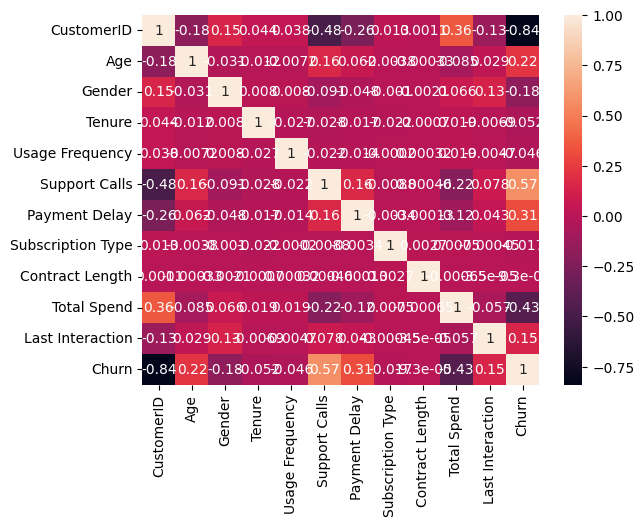

In [15]:
sns.heatmap(train_dt.corr(), annot=True)

In [16]:
features = train_dt.drop('Churn', axis=1)
target = train_dt['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-1.20462825e+00,  1.49653327e+00, -1.14494788e+00, ...,
        -1.11644331e+00,  8.44501342e-03,  2.93666039e-01],
       [ 3.78908227e-01, -1.39584231e+00,  8.73402202e-01, ...,
         1.11693094e+00,  6.18594632e-01,  9.91263944e-01],
       [-8.10710747e-01,  1.33584574e+00,  8.73402202e-01, ...,
        -1.11644331e+00, -1.22845694e+00, -1.21779609e+00],
       ...,
       [-1.51225399e+00, -9.13779717e-01, -1.14494788e+00, ...,
         2.43814693e-04, -7.59430357e-01, -1.56659504e+00],
       [ 2.01607909e-01,  1.97859587e+00, -1.14494788e+00, ...,
         1.11693094e+00,  5.85389211e-01, -7.52730818e-01],
       [-1.93899871e-01,  1.65722081e+00,  8.73402202e-01, ...,
         2.43814693e-04, -8.29991878e-01, -1.71399231e-01]])

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
model = RandomForestClassifier(n_estimators=100)

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
model.score(X_test, y_test)

0.9996143681876439

In [24]:
model.score(X_train, y_train)

1.0

In [25]:
predict = model.predict(X_test)

In [26]:
predict

array([1, 0, 1, ..., 1, 1, 1])

In [27]:
accuracy_score(y_test, predict)

0.9996143681876439